Iteration 1:
  x = 1, y = 3, ŷ = 0.0000, error = 3.0000
  x = 3, y = 6, ŷ = -2.0000, error = 8.0000
  MSE = 36.5000
  ∂J/∂m = -27.0000, ∂J/∂b = -11.0000
  Updated m = 1.7000, Updated b = 2.1000
----------------------------------------
Iteration 2:
  x = 1, y = 3, ŷ = 3.8000, error = -0.8000
  x = 3, y = 6, ŷ = 7.2000, error = -1.2000
  MSE = 1.0400
  ∂J/∂m = 4.4000, ∂J/∂b = 2.0000
  Updated m = 1.2600, Updated b = 1.9000
----------------------------------------
Iteration 3:
  x = 1, y = 3, ŷ = 3.1600, error = -0.1600
  x = 3, y = 6, ŷ = 5.6800, error = 0.3200
  MSE = 0.0640
  ∂J/∂m = -0.8000, ∂J/∂b = -0.1600
  Updated m = 1.3400, Updated b = 1.9160
----------------------------------------
Iteration 4:
  x = 1, y = 3, ŷ = 3.2560, error = -0.2560
  x = 3, y = 6, ŷ = 5.9360, error = 0.0640
  MSE = 0.0348
  ∂J/∂m = 0.0640, ∂J/∂b = 0.1920
  Updated m = 1.3336, Updated b = 1.8968
----------------------------------------
Final Predictions:
  For x = 1, ŷ = 3.2304
  For x = 3, ŷ = 5.89

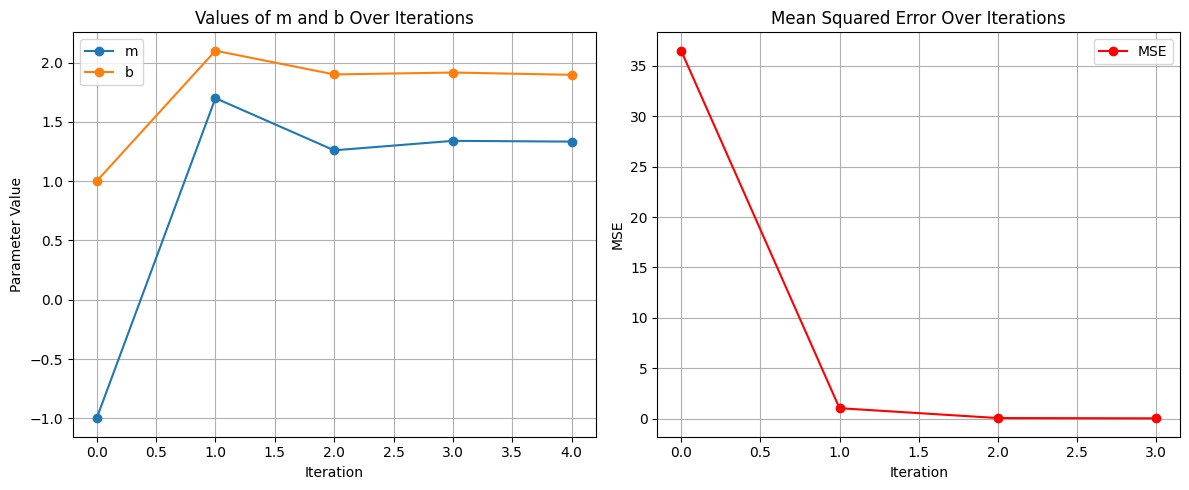

In [1]:
import matplotlib.pyplot as plt

# Step 0: Initial setup
m = -1
b = 1
alpha = 0.1
data = [(1, 3), (3, 6)]
n = len(data)

# Tracking for plotting
m_values = [m]
b_values = [b]
errors = []

# Step-by-step gradient descent
for step in range(4):
    # Step 1: Compute predictions and errors
    y_hats = []
    total_error = 0
    grad_m = 0
    grad_b = 0

    print(f"Iteration {step + 1}:")

    for x, y in data:
        y_hat = m * x + b
        y_hats.append(y_hat)
        error = y - y_hat
        total_error += error ** 2
        grad_m += -2 * x * error
        grad_b += -2 * error
        print(f"  x = {x}, y = {y}, ŷ = {y_hat:.4f}, error = {error:.4f}")

    # Step 2: Compute MSE
    mse = total_error / n
    errors.append(mse)

    print(f"  MSE = {mse:.4f}")

    # Step 3: Compute gradients
    grad_m /= n
    grad_b /= n
    print(f"  ∂J/∂m = {grad_m:.4f}, ∂J/∂b = {grad_b:.4f}")

    # Step 4: Update m and b
    m = m - alpha * grad_m
    b = b - alpha * grad_b

    print(f"  Updated m = {m:.4f}, Updated b = {b:.4f}")
    print("-" * 40)

    # Save values for plotting
    m_values.append(m)
    b_values.append(b)

# Step 5: Final prediction using updated m and b
final_predictions = [m * x + b for x, _ in data]
print("Final Predictions:")
for i, (x, _) in enumerate(data):
    print(f"  For x = {x}, ŷ = {final_predictions[i]:.4f}")

# Step 6: Plotting m, b, and error
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
iterations = list(range(5))

ax1.plot(iterations, m_values, label='m', marker='o')
ax1.plot(iterations, b_values, label='b', marker='o')
ax1.set_title('Values of m and b Over Iterations')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Parameter Value')
ax1.legend()
ax1.grid(True)

ax2.plot(iterations[:-1], errors, label='MSE', marker='o', color='red')
ax2.set_title('Mean Squared Error Over Iterations')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('MSE')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()
